<a href="https://colab.research.google.com/github/Portia-dot/API-/blob/main/Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [5]:
Messages= pd.read_csv("https://raw.githubusercontent.com/Portia-dot/DataSet/main/SPAM%20text%20message%2020170820%20-%20Data.csv?token=GHSAT0AAAAAABSTTV6ISQTLGCIIUKMZ4FXEYSV45XQ")
Messages.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Get Description of the data in the dataFrame
Messages.groupby("Category").describe().T

Category                           ham  \
Message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

Category                                                     spam  
Message count                                                 747  
        unique                                                641  
        top     Please call our customer service representativ...  
        freq                                                    4

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


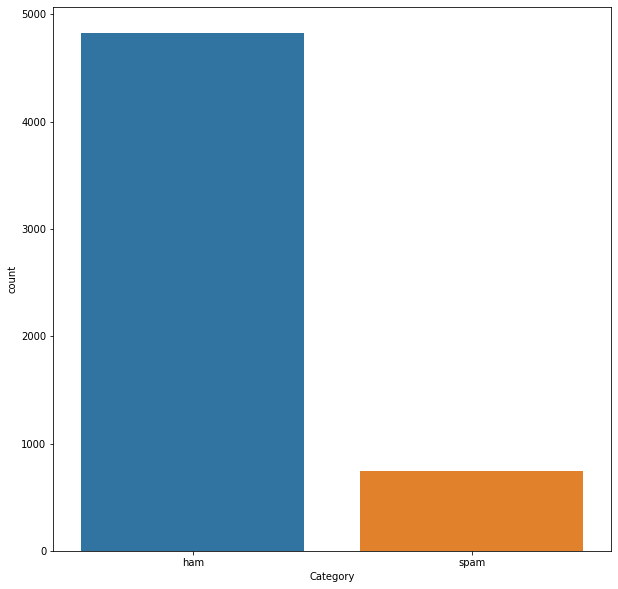

In [11]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.countplot(Messages['Category'])

In [13]:
#Make the data balance
ham_msg = Messages[Messages.Category == 'ham']
spam_msg = Messages[Messages.Category == 'spam']

In [15]:
len(ham_msg), len(spam_msg)

(4825, 747)

In [18]:
#Randomly take data from the ham_message to match the length of spam messages 
ham_msg = ham_msg.sample(n=len(spam_msg), random_state=42)
len(ham_msg)

747

In [20]:
ham_msg.shape, spam_msg.shape

((747, 2), (747, 2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Message Type')

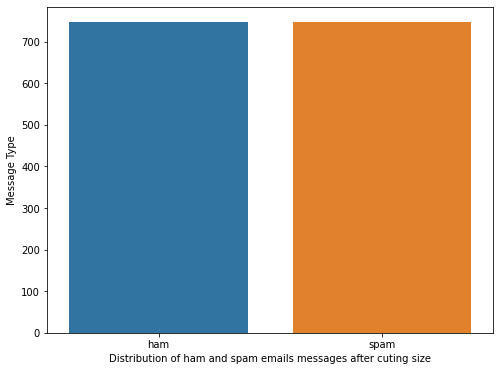

In [27]:
balanced_data = ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize = (8,6))
sns.countplot(balanced_data.Category)
plt.xlabel('Distribution of ham and spam emails messages after cuting size')
plt.ylabel('Message Type')

In [22]:
balanced_data.head()

,Category,Message
0,ham,"Aight, I'm chillin in a friend's room so text ..."
1,ham,"I'm home, my love ... If your still awake ... ..."
2,ham,I cant pick the phone right now. Pls send a me...
3,ham,My tuition is at 330. Hm we go for the 1120 to...
4,ham,Nope. Meanwhile she talk say make i greet you.


In [29]:
balanced_data['label'] = balanced_data['Category'].map({'ham': 0, 'spam': 1})

In [30]:
#Split the data using sklearn 

train_msg, test_msg, train_label, test_label = train_test_split(balanced_data['Message'], balanced_data['label'], test_size =0.2, random_state=42)

In [31]:
vocab_size = 500
oov_tok ='<OOV>'
max_len=50

In [33]:
#Preprocessing 
token = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
token.fit_on_texts(train_msg)

In [34]:
word_index = token.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'your': 8,
 'u': 9,
 'is': 10,
 'for': 11,
 'and': 12,
 'now': 13,
 '2': 14,
 'free': 15,
 'or': 16,
 'have': 17,
 'in': 18,
 'on': 19,
 'ur': 20,
 'of': 21,
 'txt': 22,
 'are': 23,
 '4': 24,
 'from': 25,
 'me': 26,
 'text': 27,
 'with': 28,
 'get': 29,
 'my': 30,
 'this': 31,
 'mobile': 32,
 'just': 33,
 'stop': 34,
 'reply': 35,
 'claim': 36,
 'no': 37,
 'it': 38,
 'be': 39,
 'only': 40,
 'will': 41,
 'that': 42,
 'www': 43,
 'so': 44,
 'new': 45,
 'send': 46,
 'out': 47,
 'we': 48,
 'not': 49,
 'cash': 50,
 'at': 51,
 'our': 52,
 'do': 53,
 'prize': 54,
 'if': 55,
 'can': 56,
 'go': 57,
 'but': 58,
 '1': 59,
 "i'm": 60,
 'won': 61,
 't': 62,
 'please': 63,
 'win': 64,
 'all': 65,
 'uk': 66,
 '150p': 67,
 'been': 68,
 'nokia': 69,
 'when': 70,
 'who': 71,
 'tone': 72,
 'what': 73,
 'com': 74,
 'urgent': 75,
 'phone': 76,
 'msg': 77,
 '50': 78,
 'day': 79,
 'by': 80,
 'co': 81,
 'up': 82,
 'want': 83,
 'week':

In [37]:
padding_type = 'post'
truncate_type ='post'
Training_seq = token.texts_to_sequences(train_msg)
Training_pad = pad_sequences(Training_seq, maxlen=50, padding = padding_type, truncating = truncate_type)

In [38]:
Testing_seq = token.texts_to_sequences(test_msg)
Testing_pad = pad_sequences(Testing_seq, maxlen=50, padding = padding_type, truncating = truncate_type)

In [55]:
# Create a model 
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, 16, input_length=50),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(32,),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

#Compile model 
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics =['accuracy'])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [56]:
history = model.fit(Training_pad, train_label, validation_data=(Testing_pad, test_label), epochs= 30, callbacks=[early_stop])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 [==============================] - 1s 13ms/step - loss: 0.6842 - accuracy: 0.6293 - val_loss: 0.6681 - val_accuracy: 0.8027
Epoch 2/30
38/38 [==============================] - 0s 3ms/step - loss: 0.6089 - accuracy: 0.8343 - val_loss: 0.5347 - val_accuracy: 0.8696
Epoch 3/30
38/38 [==============================] - 0s 3ms/step - loss: 0.3942 - accuracy: 0.8895 - val_loss: 0.3318 - val_accuracy: 0.8930
Epoch 4/30
38/38 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9180 - val_loss: 0.2354 - val_accuracy: 0.9097
Epoch 5/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1544 - accuracy: 0.9531 - val_loss: 0.1741 - val_accuracy: 0.9365
Epoch 6/30
38/38 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9674 - val_loss: 0.1475 - val_accuracy: 0.9465
Epoch 7/30
38/38 [==============================] - 0s 3ms/step - loss: 0.0918 - accuracy: 0.9724 - val_loss: 0.1352 - val_accuracy: 0.9498
Epoch 8/30
38/38 [============

In [57]:
model.evaluate(Testing_pad, test_label)

10/10 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9565


[0.13011696934700012, 0.95652174949646]

No handles with labels found to put in legend.


Text(0.5, 0, 'epochs')

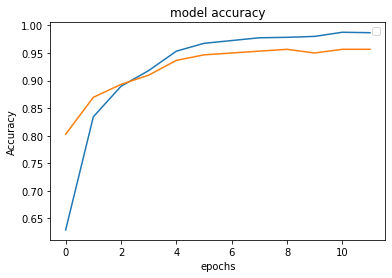

In [67]:
#Visualize
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('epochs')
